## Dimensionality Reduction 
## Feature Selection
## L1 & L2 Regularization

L1 regularization : 

\begin{equation}
L1 :  \sum_{j=1}^m \lvert w_{j} \lvert 
\end{equation}

L2 regularization : 

\begin{equation}
L1 :  \sum_{j=1}^m w_{j}^2 
\end{equation}

In [1]:
import pandas as pd
import numpy as np

# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Split the data into train and test set

In [3]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8, stratify = y)

## Scale the feature

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
print(X_train_std)

[[ 0.12998792 -0.58690926  0.58654077 ...  0.67169107 -0.13843213
   1.13956251]
 [ 0.680734   -0.43169359  0.79868775 ...  0.67169107  1.65908313
   0.29793661]
 [ 1.57416653 -0.52870338  0.16224682 ...  0.33128158  1.79629803
   1.0100816 ]
 ...
 [ 0.50939078  0.29587988 -0.12061582 ... -1.11545876 -0.1933181
   0.08753014]
 [ 0.91327123  0.97494844  0.55118294 ... -0.00912792 -1.08521498
  -0.23617213]
 [-1.81598157  1.44059546 -1.9945808  ... -0.90270283  0.27321258
  -0.61814081]]


## L1 regularization

In [5]:
from sklearn.linear_model import LogisticRegression

lr_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
lr_l1.fit(X_train_std, y_train)
print(f'Training set accuracy: {lr_l1.score(X_train_std, y_train)}, Test set accuracy: {lr_l1.score(X_test_std, y_test)}')

Training set accuracy: 0.9919354838709677, Test set accuracy: 0.9814814814814815


## L2 regularization

In [6]:
lr_l2 = LogisticRegression(penalty='l2', C=0.1)
lr_l2.fit(X_train_std, y_train)
print(f'Training set accuracy: {lr_l2.score(X_train_std, y_train)}, Test set accuracy: {lr_l2.score(X_test_std, y_test)}')

Training set accuracy: 0.9919354838709677, Test set accuracy: 1.0


In [7]:
print("coefficients for l1 : {}".format(lr_l1.coef_))
print("coefficients for l2 : {}".format(lr_l2.coef_))

print("intercept for l1 : {}".format(lr_l1.intercept_))
print("intercept for l2 : {}".format(lr_l2.intercept_))

coefficients for l1 : [[ 3.12957395e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  6.59499809e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.39895692e+00]
 [-8.44950500e-01 -4.79986776e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -7.76908667e-01  7.34497072e-02  0.00000000e+00
  -4.36511644e-01]
 [ 0.00000000e+00  1.29027478e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.29635918e-01  0.00000000e+00
   0.00000000e+00  4.88840715e-01 -5.01877800e-01 -4.60149589e-01
   0.00000000e+00]]
coefficients for l2 : [[ 0.4296037   0.01093473  0.22386139 -0.33538117  0.07293714  0.24151872
   0.32671932 -0.11521945  0.06210735  0.05757315  0.15520909  0.29621362
   0.52671645]
 [-0.5557195  -0.20608288 -0.30418513  0.22105452 -0.13108107 -0.03050785
   0.09796842  0.03731307  0.14921795 -0.44006357  0.27821485  0.11

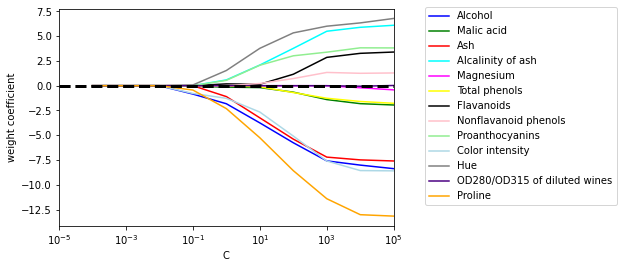

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0, solver = 'liblinear', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

plt.show()


## Sequential feature selection algorithms


In [9]:
from sklearn.metrics import accuracy_score

def calc_score(estimator, X_train, y_train, X_test, y_test, indices):
    estimator.fit(X_train[:, indices], y_train)
    y_pred = estimator.predict(X_test[:, indices])
    score = accuracy_score(y_test, y_pred)
    return score

In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone
from itertools import combinations

dim = X_train_std.shape[1]

indices = tuple(range(dim))
final_subsets = [indices]
knn = KNeighborsClassifier(n_neighbors=5)

score = calc_score(knn, X_train_std, y_train, X_test_std, y_test, indices)
final_scores = [score]
k_features = 1

while dim > k_features:
    scores = []
    subsets = []

    for p in combinations(indices, r=dim - 1):
        score = calc_score(knn, X_train_std, y_train, X_test_std, y_test, p)
        scores.append(score)
        subsets.append(p)

    best = np.argmax(scores)
    indices = subsets[best]
    final_subsets.append(indices)
    dim -= 1
    final_scores.append(scores[best])

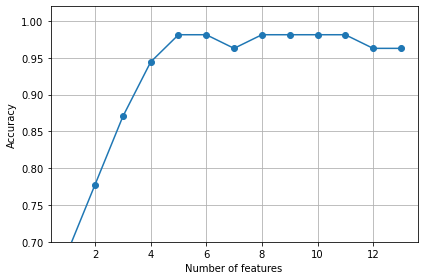

In [11]:
k_feat = [len(k) for k in final_subsets]
plt.plot(k_feat, final_scores, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

## Random Forests

In [61]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

## Feature Extraction

## Principle Component Analysis (PCA)

In [ ]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals.shape, eigen_vecs.shape

## Reduce feature to 2D

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

In [ ]:
X_train_pca = X_train_std.dot(eigen_vecs)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(X_train_std)
pca.explained_variance_ratio_

In [ ]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [44]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'lbfgs', multi_class = "auto")
lr = lr.fit(X_train_pca, y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\corey\AppData\Local\Temp/ipykernel_27888/442015021.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequence, which should

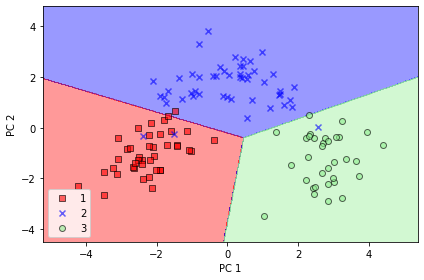

In [46]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\corey\AppData\Local\Temp/ipykernel_27888/442015021.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequence, which should

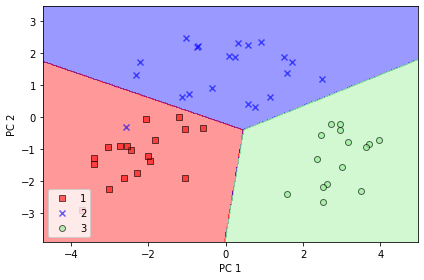

In [47]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show()

## LDA 

## Computing the scatter matrices

In [48]:
np.set_printoptions(4)

mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9228 -0.316   0.3847 -0.7173  0.4608  0.8714  0.9517 -0.5465  0.5079
  0.2031  0.4787  0.7461  1.1824]

MV 2: [-0.912  -0.3896 -0.4162  0.2438 -0.4128 -0.0584  0.0366  0.0112  0.0559
 -0.8441  0.4118  0.2587 -0.7408]

MV 3: [ 0.2353  0.9829  0.1526  0.5218  0.0529 -0.9942 -1.2378  0.6621 -0.7158
  1.0266 -1.2186 -1.3189 -0.3465]



## Compute the within-class scatter matrix:

In [49]:
d = 13
S_W = np.zeros((d, d))
for index, mean in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d, d)) # scatter matrix for each class
    for row in X_train_std[y_train == index]:
        row, mean = row.reshape((d, 1)), mean.reshape((d, 1)) # make column vectors
        class_scatter += (row - mean).dot((row-mean).T)
    S_W += class_scatter  # sum class scatter matrices
print("Within-class scatter matrix: %sx%s" % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 13x13


In [50]:
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

Class label distribution: [41 50 33]


## Normalize the within-class scatter matrix:

Since the class label is not distributed evenly, we need to normalize the with-in class scatter matrix


In [51]:
for index in range(1,4):
    class_scatter = np.cov(X_train_std[y_train == index].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


## Compute the between-class scatter matrix:

In [52]:
mean_overall = np.mean(X_train_std, axis = 0)
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))
    

Between-class scatter matrix: 13x13


## Selecting linear discriminants for the new feature subspace

Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:

In [53]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [54]:
# Sort eigenvectors in decreasing order of the eigenvalues:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in decreasing order:

9.249776982774895
4.038069966765536
1.7763568394002505e-15
6.204313632013442e-16
4.902384448331995e-16
4.902384448331995e-16
4.169882071155223e-16
3.673861427104917e-16
3.673861427104917e-16
3.216775501314785e-16
2.2841290790380855e-16
1.9973858127321001e-16
1.569356299511592e-17


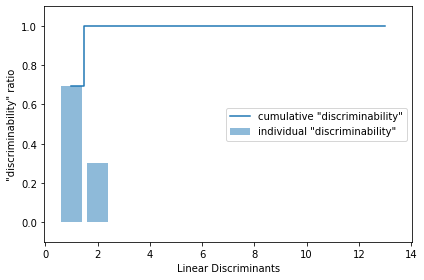

In [55]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/lda1.png', dpi=300)
plt.show()

In [56]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.2572 -0.4632]
 [ 0.0577 -0.1797]
 [-0.0521 -0.3757]
 [ 0.2063  0.255 ]
 [-0.0195 -0.0033]
 [ 0.0626 -0.0895]
 [-0.6631  0.3576]
 [-0.086   0.0887]
 [ 0.0228  0.108 ]
 [ 0.4103 -0.2776]
 [-0.1121  0.2363]
 [-0.2732  0.0978]
 [-0.4217 -0.499 ]]


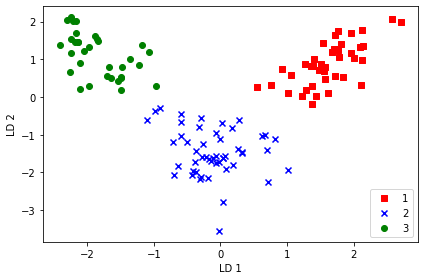

In [57]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0] * (-1),
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./figures/lda2.png', dpi=300)
plt.show()

## LDA via scikit-learn


In [58]:
if Version(sklearn_version) < '0.18':
    from sklearn.lda import LDA
else:
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\corey\AppData\Local\Temp/ipykernel_27888/442015021.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequence, which should

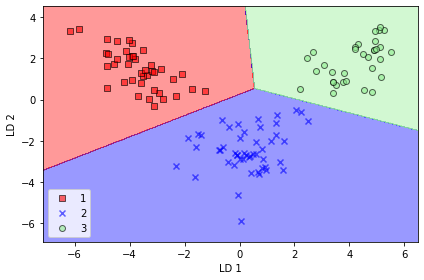

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda3.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
C:\Users\corey\AppData\Local\Temp/ipykernel_27888/442015021.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
*c* argument looks like a single numeric RGB or RGBA sequence, which should

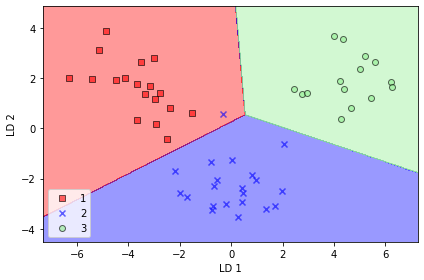

In [60]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./images/lda4.png', dpi=300)
plt.show()